In [ ]:
dd=pd.read_csv("../input/Train_Kaggle.csv")
dd

NameError: name 'pd' is not defined

In [ ]:
dd=pd.read_csv("../input/Train_Kaggle.csv")
#dd
dd=dd.loc[dd['ProductCategory'] == 'OtherClothing']
#dd
dd1=dd.groupby('Month', as_index=False)['Sales(In ThousandDollars)'].mean()
other=dd1

NameError: name 'pd' is not defined

In [ ]:
women
#men
#other

NameError: name 'women' is not defined

In [ ]:
import numpy as np # linear algebra
import pandas as pd
import os
print(os.listdir("../input"))
import calendar
import datetime
from time import strptime
data_e = pd.read_excel('../input/MacroEconomicData.xlsx', 'Sheet1', index_col=None)
data_w = pd.read_excel('../input/WeatherData.xlsx', index_col=None)
#data_xls = pd.read_excel('../input/AttributesDescription.xlsx', index_col=None)
data_h = pd.read_excel('../input/Events_HolidaysData.xlsx')
#data_xls
data_e.to_csv('Economic.csv', encoding='utf-8')
data_w.to_csv('Weather.csv', encoding='utf-8')
data_h.to_csv('Holiday.csv', encoding='utf-8')
de=pd.read_csv("Economic.csv")
dw=pd.read_csv("Weather.csv")
dh=pd.read_csv("Holiday.csv")
de[['Year','Month']]=de['Year-Month'].str.split("-",expand=True,)
de=de.drop('Year-Month',axis=1)
dh[['year','Month','Day']]=dh['MonthDate'].str.split("-",expand=True)
dh=dh.drop('year',axis=1)
dh=dh.drop('MonthDate',axis=1)
dh['Month'] = pd.to_datetime(dh['Month'], format='%m').dt.month_name().str.slice(stop=3)
data_w1 = pd.read_excel('../input/WeatherData.xlsx', sheet_name='2009', ignore_index=True)
data_w2 = pd.read_excel('../input/WeatherData.xlsx', sheet_name='2010', ignore_index=True)
data_w3 = pd.read_excel('../input/WeatherData.xlsx', sheet_name='2011', ignore_index=True)
data_w4 = pd.read_excel('../input/WeatherData.xlsx', sheet_name='2012', ignore_index=True)
data_w5 = pd.read_excel('../input/WeatherData.xlsx', sheet_name='2013', index_col=None)
data_w6 = pd.read_excel('../input/WeatherData.xlsx', sheet_name='2014', index_col=None)
data_w7 = pd.read_excel('../input/WeatherData.xlsx', sheet_name='2015', index_col=None)
data_w8 = pd.read_excel('../input/WeatherData.xlsx', sheet_name='2016', index_col=None)
data_w1['Year'] = data_w1['Year'].astype('str') 
data_w2.Year='2010'
data_w3.Year='2011'
data_w4.Year='2012'
data_w5.Year='2013'
data_w6.Year='2014'
data_w7.Year='2015'
data_w8.Year='2016'

cdf=data_w1
cdf = cdf.append(data_w2)
cdf = cdf.append(data_w3)
cdf = cdf.append(data_w4)
cdf = cdf.append(data_w5)
cdf = cdf.append(data_w6)
cdf = cdf.append(data_w7)
cdf = cdf.append(data_w8)
dw2=cdf.groupby(['Year','Month'], as_index=False).agg(lambda x : x.mean() if x.dtype=='int64' else x.head(1))
dw2['Year'] = dw2['Year'].str.strip()
de['Year'] = de['Year'].str.strip()
dw2['Month'] = dw2['Month'].str.strip()
de['Month'] = de['Month'].str.strip()
data1=pd.merge(de,dw2, on=['Year','Month'])
data1['Month'] = data1['Month'].apply(lambda x:  strptime(x, '%b').tm_mon)
#data1.Month = data1.Month.map(d)
#data1
df1 = pd.read_csv('../input/Train_Kaggle.csv')
df2 = pd.read_csv('../input/Test_Kaggle.csv')
#df1
df1=df1.loc[df1['ProductCategory'] == 'MenClothing']
df2=df2.loc[df2['ProductCategory'] == 'MenClothing']
df = pd.concat([df1,df2])
df['Year'] = df['Year'].astype('str') 
#dd=pd.read_csv("../input/Train_Kaggle.csv")
#dd=dd.loc[dd['ProductCategory'] == 'WomenClothing']
data1=data1.drop(data1[data1['Year']>'2015'].index)
#data1=data1.drop(data1[data1['Year']<'2010'].index)
#dd['Year'] = dd['Year'].astype('str')
#dd.Year.dtype
df['Year'] = df['Year'].str.strip()
data2=pd.merge(data1,df, on=['Year','Month'])
data3=data2.replace('?', '0', regex=False)
data3=data3.replace('T', '0', regex=False)
#data3
holidays = pd.read_excel("../input/Events_HolidaysData.xlsx")
holidays['Month'] = pd.DatetimeIndex(holidays['MonthDate']).month
holidays["Year"] = holidays["Year"].astype(str)
holidays["Month"] = holidays["Month"].astype(str)
holidays["YearMonth"] = holidays["Year"] + "-" + holidays["Month"]
holidayscount = holidays["YearMonth"].value_counts()
holidayscount = pd.DataFrame(data=holidayscount)
holidayscount = holidayscount.rename(columns={'YearMonth':'NoOfHolidays'})
holidayscount['Month'] = pd.DatetimeIndex(holidayscount.index).month
holidayscount['Year']= pd.DatetimeIndex(holidayscount.index).year
holidayscount=holidayscount.drop(holidayscount[holidayscount['Year']>2015].index)
#holidayscount=holidayscount.drop(holidayscount[holidayscount['Year']<2010].index)
holidayscount['Year'] = holidayscount['Year'].astype('str')
data3 = pd.merge(data3,holidayscount, 'left', on = ['Month','Year'])
cols = data3.columns.tolist()
cols = cols[-1:] + cols[:-1]
data3 = data3[cols]
data3=data3.drop("Unnamed: 0",axis=1)
data3=data3.fillna(method='pad')
data3
#dh.set_datetimeIndex('Month').resample('MS').asfreq().fillna(0)


['WeatherData.xlsx', 'Test_Kaggle.csv', 'AttributesDescription.xlsx', 'Sample_Submission.csv', 'Train_Kaggle.csv', 'Events_HolidaysData.xlsx', 'MacroEconomicData.xlsx']


,NoOfHolidays,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,Year,Month,Day,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,Humidity (%) avg,Humidity (%) low,Sea Level Press. (hPa) high,Sea Level Press. (hPa) avg,Sea Level Press. (hPa) low,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent,ProductCategory,Sales(In ThousandDollars)
0,2.0,14421.752895,14407.053343,233.402,Democrats,7.8,12.03,11.44,22.05,137,57.70,4.02,9.296,7.559,799,12.589,4.170,11.550,2009,1,1.0,-3,-6,-9,-16,-17,-19,54,43,32,1025,1023,1015,16,16,16,37,18,60,0,NaN,MenClothing,524.0
1,2.0,14389.200466,14366.176571,234.663,Democrats,8.3,12.97,11.05,22.22,200,55.21,-4.32,9.296,7.559,799,12.589,3.870,11.100,2009,2,1.0,11,4,-3,-2,-6,-13,58,48,38,1016,1013,1010,16,16,16,24,12,40,0,NaN,MenClothing,496.0
2,2.0,14340.701639,14351.786822,235.067,Democrats,8.7,12.97,11.05,22.22,0,51.50,-6.72,9.296,7.559,799,12.589,3.720,11.650,2009,3,1.0,2,0,-2,-2,-5,-12,92,66,39,1022,1018,1015,16,10,1,32,16,40,3.81,"Fog , Snow",MenClothing,542.0
3,1.0,14326.815525,14351.601731,235.582,Democrats,9.0,12.97,11.05,22.13,214,56.78,10.25,9.296,7.559,787,12.400,3.620,12.225,2009,4,1.0,9,8,6,7,4,2,100,83,65,1025,1021,1018,16,12,2,24,11,35,9.14,Rain,MenClothing,669.0
4,2.0,14345.904809,14368.123959,235.975,Democrats,9.4,13.32,11.25,22.04,0,61.95,9.11,9.297,7.400,803,12.384,3.520,12.300,2009,5,1.0,22,17,12,18,16,11,100,84,68,1020,1013,1009,13,6,1,24,11,34,10.67,"Fog , Rain",MenClothing,650.0
5,1.0,14348.530666,14346.820106,237.172,Democrats,9.5,13.32,11.25,21.96,0,61.39,-0.90,8.668,7.760,796,12.876,3.470,10.300,2009,6,1.0,22,16,10,11,4,-1,67,50,32,1021,1018,1015,16,16,16,23,8,29,0,"Fog , Rain",MenClothing,607.0
6,2.0,14317.372922,14345.676097,237.600,Democrats,9.5,13.32,11.25,22.00,0,64.80,5.55,8.905,7.753,796,12.863,3.470,9.700,2009,7,1.0,27,23,19,20,18,17,100,81,62,1009,1006,1004,16,11,2,24,8,35,0,"Fog , Rain",MenClothing,575.0
7,2.0,14424.284901,14435.812509,238.282,Democrats,9.6,13.71,10.89,22.16,0,64.26,-0.83,8.905,7.619,809,12.840,3.470,9.700,2009,8,1.0,28,23,18,19,17,14,93,68,43,1019,1017,1015,16,16,13,14,7,24,0,"Fog , Rain",MenClothing,551.0
8,1.0,14410.777177,14425.972752,238.568,Democrats,9.8,13.71,10.89,22.20,0,64.07,-0.30,8.989,7.582,827,13.071,3.470,10.000,2009,9,1.0,23,19,14,13,10,8,80,61,41,1026,1025,1023,16,16,16,23,6,27,0,"Fog , Rain",MenClothing,579.0
9,2.0,14596.605447,14595.393094,238.380,Democrats,10.0,13.71,10.89,22.27,0,66.82,4.29,8.989,7.586,799,12.631,3.370,10.000,2009,10,1.0,13,11,8,6,5,4,77,68,59,1017,1016,1015,16,16,16,19,8,26,0,"Fog , Rain",MenClothing,610.0


In [ ]:
data31=data3
data31=data31.drop('ProductCategory',axis=1)
data31=data31.drop('WeatherEvent',axis=1)
data31=data31.drop('PartyInPower',axis=1)
#data31=data31.drop([60])
#data31 = data31.astype('int')
target_data=data31['Sales(In ThousandDollars)']
#data31=data31.drop('Sales(In ThousandDollars)',axis=1)
#data31
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data31=data31.convert_objects(convert_numeric=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if sys.path[0] == '':


In [ ]:
def corr_features(df,cols,bar=0.9):
    for c,i in enumerate(cols[:-1]):
        col_set = set(cols)
        for j in cols[c+1:]:
            if i==j:
                continue
           
            score = df[i].corr(df[j])
            
            if score>bar:
                cols = list(col_set-set([j]))
            if score<-bar:
                cols = list(col_set-set([j]))
    return cols

In [ ]:
data32=data31.drop(['Sea Level Press.\xa0(hPa) low',
 #'Monthly Real GDP Index (inMillion$)',
 'Temp low (°C)',
 #'Temp avg (°C)',
 #'CommercialBankInterestRateonCreditCardPlans',
 'Dew Point high (°C)',
 'Visibility\xa0(km) high',
 #'Visibility\xa0(km) avg',
 'Change(in%)',
 #'Month',
 #'Humidity\xa0(%) low',
 'Day',
 #'Sea Level Press.\xa0(hPa) avg',
 'Temp high (°C)',
 'Wind\xa0(km/h) low',
 #'yieldperharvested acre',
 #'Mill use  (in  480-lb netweright in million bales)',
 #'Wind\xa0(km/h) avg',
 'Wind\xa0(km/h) high',
 'Visibility\xa0(km) low',
 'AdvertisingExpenses (in Thousand Dollars)',
 'Humidity\xa0(%) high',
 #'Precip.\xa0(mm) sum',
 #'Cotton Monthly Price - US cents per Pound(lbs)',
 #'Exports',
 'Sea Level Press.\xa0(hPa) high',
 #'Average upland planted(million acres)',
 #'Dew Point avg (°C)',
 'Dew Point low (°C)'],axis=1)
 #'Average upland harvested(million acres)',
 #'Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan'],axis=1)

In [ ]:
#data31.corr[]
correlations = data31.corr()['Sales(In ThousandDollars)'].sort_values()

# Display correlations
#print('Most Positive Correlations:\n', correlations.tail(15))
#print('\nMost Negative Correlations:\n', correlations.head(15))
correlations

unemployment rate                                                   -0.697078
Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan   -0.600554
CommercialBankInterestRateonCreditCardPlans                         -0.441411
Exports                                                             -0.361831
yieldperharvested acre                                              -0.233768
Cotton Monthly Price - US cents per Pound(lbs)                      -0.231511
AdvertisingExpenses (in Thousand Dollars)                           -0.171667
Average upland planted(million acres)                               -0.132885
Temp high (°C)                                                      -0.088303
Change(in%)                                                         -0.083925
Dew Point low (°C)                                                  -0.073569
Temp avg (°C)                                                       -0.071761
Production (in  480-lb netweright in million bales)             

In [ ]:
data32=data31.drop(['unemployment rate',
 #'Monthly Real GDP Index (inMillion$)',
 'Temp low (°C)',
 'Temp avg (°C)',
 'CommercialBankInterestRateonCreditCardPlans',
 'Dew Point high (°C)',
 #'Humidity (%) avg',
 'Visibility\xa0(km) avg',
 'Change(in%)',
 #'Month',
 'Humidity\xa0(%) low',
 'Day',
 'Sea Level Press.\xa0(hPa) avg',
 'Sea Level Press.\xa0(hPa) low',
 'Temp high (°C)',
 'Wind\xa0(km/h) low',
 'Wind\xa0(km/h) high',
 'yieldperharvested acre',
 'Mill use  (in  480-lb netweright in million bales)',
 'Wind\xa0(km/h) avg',
 'Production (in  480-lb netweright in million bales)',
 'Visibility\xa0(km) low',
 'Visibility\xa0(km) high',
 'AdvertisingExpenses (in Thousand Dollars)',
 'Humidity\xa0(%) high',
 'Precip.\xa0(mm) sum',
 'Cotton Monthly Price - US cents per Pound(lbs)',
 'Exports',
 'Sea Level Press.\xa0(hPa) high',
 'Average upland planted(million acres)',
 'Dew Point avg (°C)',
 'Dew Point low (°C)',
 'Average upland harvested(million acres)',
 'Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan'],axis=1)
#data32=data32.drop([data32.columns[2],data32.columns[5],data32.columns[4],data32.columns[7]], axis=1)
#data32=data32.drop([data32.columns[2],data32.columns[5],data32.columns[1],data32.columns[7]], axis=1)
#data32=data32.drop([data32.columns[0]], axis=1)
#data32=data32.drop(data32.columns[5], axis=1)
#data32=data32.drop(data32.columns[8], axis=1)
data32=data32.drop(data32.columns[7], axis=1)
#data32=data32.drop(data32.columns[0], axis=1)


In [ ]:
data32

,NoOfHolidays,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,Earnings or wages in dollars per hour,Year,Month,Sales(In ThousandDollars)
0,2.0,14421.752895,14407.053343,233.402,22.05,2009,1,524.0
1,2.0,14389.200466,14366.176571,234.663,22.22,2009,2,496.0
2,2.0,14340.701639,14351.786822,235.067,22.22,2009,3,542.0
3,1.0,14326.815525,14351.601731,235.582,22.13,2009,4,669.0
4,2.0,14345.904809,14368.123959,235.975,22.04,2009,5,650.0
5,1.0,14348.530666,14346.820106,237.172,21.96,2009,6,607.0
6,2.0,14317.372922,14345.676097,237.600,22.00,2009,7,575.0
7,2.0,14424.284901,14435.812509,238.282,22.16,2009,8,551.0
8,1.0,14410.777177,14425.972752,238.568,22.20,2009,9,579.0
9,2.0,14596.605447,14595.393094,238.380,22.27,2009,10,610.0


In [ ]:
#data_other=data32
#data32=data_other
#data_women=data32
#data_men=data32

In [ ]:
data32=data32.convert_objects(convert_numeric=True)
data32=data32.fillna(method='pad')
x_train = data32.loc[data32['Year'] < 2015]
y_train = data32.loc[data32['Year'] < 2015, 'Sales(In ThousandDollars)']
x_test = data32.loc[data32['Year'] >= 2015].reset_index(drop=True)
y_test = data32.loc[data32['Year'] >= 2015, 'Sales(In ThousandDollars)'].reset_index(drop=True)
x_test=x_test.drop('Sales(In ThousandDollars)',axis=1)
x_train=x_train.drop('Sales(In ThousandDollars)',axis=1)
#x_test=x_test.drop('Year',axis=1)
#x_train=x_train.drop('Year',axis=1)
#preds = xboost(x_train, y_train, x_test)
#SMAPE(preds, y_test)
#women=preds

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [ ]:
preds = xboost(x_train, y_train, x_test)
#SMAPE(preds, y_test)
men=preds
men

NameError: name 'xboost' is not defined

In [ ]:
from sklearn.ensemble import RandomForestRegressor
m = RandomForestRegressor(n_estimators=100)
m.fit(x_train, y_train)
men=m.predict(x_test)
men

array([ 642.26,  645.84,  733.71,  758.54,  763.73,  689.73,  753.86,
        754.65,  687.95,  765.63,  775.44, 1071.47])

In [ ]:
women

NameError: name 'women' is not defined

In [ ]:
x_train = df.loc[df['Year'] < 2014]
y_train = df.loc[df['Year'] < 2014, 'Sales(In ThousandDollars)']
x_test = df.loc[df['Year'] >= 2014].reset_index(drop=True)
y_test = df.loc[df['Year'] >= 2014, 'Sales(In ThousandDollars)'].reset_index(drop=True)

TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
import xgboost as xgb
def xboost(x_train, y_train, x_test):
    """Trains xgboost model and returns Series of predictions for x_test"""
    dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=list(x_train.columns))
    dtest = xgb.DMatrix(x_test, feature_names=list(x_test.columns))

    params = {'max_depth':3,
              'eta':0.2,
              'silent':1,
              'subsample':1}
    num_rounds = 1500

    bst = xgb.train(params, dtrain, num_rounds)
    
    return pd.Series(bst.predict(dtest))

In [ ]:
def SMAPE (forecast, actual):
    """Returns the Symmetric Mean Absolute Percentage Error between two Series"""
    masked_arr = ~((forecast==0)&(actual==0))
    diff = abs(forecast[masked_arr] - actual[masked_arr])
    avg = (abs(forecast[masked_arr]) + abs(actual[masked_arr]))/2
    
    print('SMAPE Error Score: ' + str(round(sum(diff/avg)/len(forecast) * 100, 2)) + ' %')

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  ax.set_xlim(boundaries_list[j])
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  ax.set_ylim(boundaries_list[i])
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_misc.py:100: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  ax.set_xlim(boundaries_list[i])


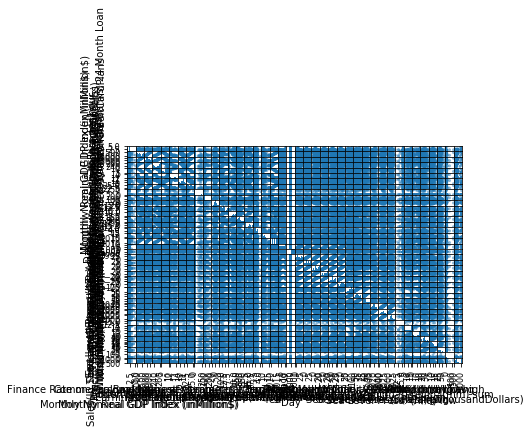

In [ ]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
#url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
#names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
#data = pandas.read_csv(url, names=names)
scatter_matrix(data31)
plt.show()
 
 


In [ ]:
other.shape
#men

NameError: name 'other' is not defined

In [ ]:
import csv
with open("team_14_submission_2.csv", 'w') as csvFile:
    writer = csv.writer(csvFile)
    print(csvFile)
    writer.writerow(['Year','Sales(In ThousandDollars)'])
    count = 0
    for i in range(12):
        print(women[i])
        print(men[i])
        print(other[i])
        writer.writerow([i + 1 + count,women[i]])
        writer.writerow([i + 2 + count,men[i]])
        writer.writerow([i + 3 + count,other[i]])
        count = count + 2

<_io.TextIOWrapper name='team_14_submission_2.csv' mode='w' encoding='UTF-8'>


NameError: name 'women' is not defined

In [ ]:
dd1=pd.read_csv("team_14_submission_2.csv")
dd1

,Year,Sales(In ThousandDollars)
